## Observations and Insights 

In [49]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from IPython.display import display_markdown
from scipy.stats import linregress
import random

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [50]:
mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_metadata.head(4)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17


In [51]:
study_results = pd.read_csv(study_results_path)
study_results.head(4)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0


In [52]:
# Combine the data into a single dataset
data_df = pd.merge(mouse_metadata, study_results,how='outer', on='Mouse ID')
data_df.head(4)
# Display the data table for preview

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1


In [53]:
data_df.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [54]:
# Checking the number of mice.

unique_mice = len(mouse_metadata["Mouse ID"].unique())
with_duplicates = len(study_results["Mouse ID"])
print(f"The number of unique mice: {unique_mice}, with duplicates: {with_duplicates}")

The number of unique mice: 249, with duplicates: 1893


In [55]:
mice = data_df["Drug Regimen"].unique()
mice

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [56]:
mica_df = data_df["Drug Regimen"].value_counts()
mica_df

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     161
Name: Drug Regimen, dtype: int64

In [57]:

mice_df = data_df.set_index("Drug Regimen")
mice_df.head()

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Ramicane,k403,Male,21,16,0,45.000000,0
Ramicane,k403,Male,21,16,5,38.825898,0
Ramicane,k403,Male,21,16,10,35.014271,1
Ramicane,k403,Male,21,16,15,34.223992,1
Ramicane,k403,Male,21,16,20,32.997729,1


In [58]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice =data_df.groupby(['Drug Regimen','Mouse ID']).agg(\
 duplicate_mice=('Tumor Volume (mm3)',lambda x: x.iloc[-1])).round(3)
duplicate_mice

duplicate_mice
Drug Regimen Mouse ID                
Capomulin    b128              38.983
             b742              38.940
             f966              30.486
             g288              37.074
             g316              40.159
...                               ...
Zoniferol    q633              70.828
             s337              62.110
             w140              47.718
             w575              68.401
             x613              48.078

[249 rows x 1 columns]

In [59]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_df = data_df[data_df.duplicated(["Mouse ID", "Timepoint"])]
duplicate_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [60]:
duplicate_mice.count()

duplicate_mice    249
dtype: int64

In [61]:
#data frame
DataFrame = duplicate_mice.stack(level=0).unstack(level=0)
DataFrame


,Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Mouse ID,,,,,,,,,,,
a203,duplicate_mice,NaN,NaN,67.973,NaN,NaN,NaN,NaN,NaN,NaN,NaN
a251,duplicate_mice,NaN,NaN,65.526,NaN,NaN,NaN,NaN,NaN,NaN,NaN
a262,duplicate_mice,NaN,NaN,NaN,NaN,NaN,70.718,NaN,NaN,NaN,NaN
a275,duplicate_mice,NaN,62.999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
a366,duplicate_mice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.441,NaN
...,...,...,...,...,...,...,...,...,...,...,...
z435,duplicate_mice,NaN,NaN,NaN,NaN,NaN,NaN,48.711,NaN,NaN,NaN
z578,duplicate_mice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.639,NaN,NaN
z581,duplicate_mice,NaN,NaN,62.754,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:

DataFrame.count()

Drug Regimen
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     25
Ramicane     25
Stelasyn     24
Zoniferol    25
dtype: int64

In [63]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
drop_duplicates_df = data_df.drop_duplicates("Mouse ID")
drop_duplicates_df
# Checking the number of mice in the clean DataFrame.


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [64]:
# Checking the number of mice in the clean DataFrame.
dataframe_c = duplicate_mice.stack(level=0)
dataframe_c.count

<bound method Series.count of Drug Regimen  Mouse ID                
Capomulin     b128      duplicate_mice    38.983
              b742      duplicate_mice    38.940
              f966      duplicate_mice    30.486
              g288      duplicate_mice    37.074
              g316      duplicate_mice    40.159
                                           ...  
Zoniferol     q633      duplicate_mice    70.828
              s337      duplicate_mice    62.110
              w140      duplicate_mice    47.718
              w575      duplicate_mice    68.401
              x613      duplicate_mice    48.078
Length: 249, dtype: float64>

## Summary Statistics

In [65]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



In [66]:
mean = data_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.322552
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [67]:
median = data_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.854632
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [68]:
variance = data_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
variance

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     42.351070
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [69]:
standard_deviation = data_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
standard_deviation

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.507770
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [70]:
sem = data_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.512884
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [71]:
summary_dataframe = {
    "Mean": mean,
    "Median": median,
    "Variance": variance,
    "Standard Deviation": standard_deviation,
    "SEM": sem
}

summary_table = pd.DataFrame(summary_dataframe)
summary_table

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


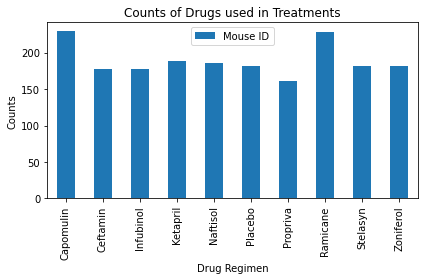

In [72]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_data = pd.DataFrame(data_df.groupby("Drug Regimen").count()).reset_index()
drug_data_df = drug_data[["Drug Regimen", "Mouse ID"]]
drug_data_df = drug_data_df.set_index("Drug Regimen")
drug_data_df.plot(kind = "bar")
plt.title("Counts of Drugs used in Treatments")
plt.ylabel("Counts")
plt.tight_layout()

## Bar and Pie Charts

Text(0, 0.5, 'Counts')

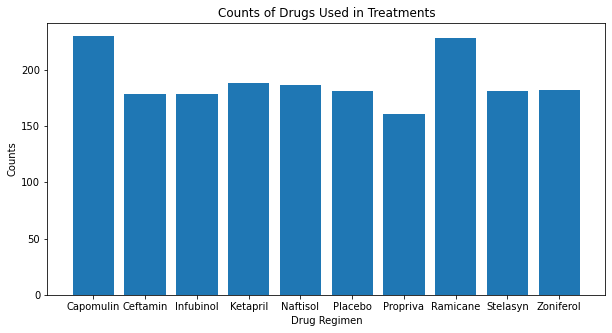

In [73]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
the_drugs = summary_table.index.tolist()
x_axis = the_drugs
drug_counts = (data_df.groupby("Drug Regimen")["Mouse ID"].count()).tolist()
y_axis = drug_counts
plt.figure(figsize=(10,5))
plt.bar(x_axis, y_axis)
plt.title("Counts of Drugs Used in Treatments")
plt.xlabel("Drug Regimen")
plt.ylabel("Counts")


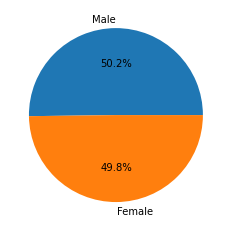

In [74]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
counts = mouse_metadata.Sex.value_counts()
plt.pie(counts.values,labels=["Male", "Female"],autopct='%1.1f%%')
plt.show()


([<matplotlib.patches.Wedge at 0x2a0de6ec910>,
 [Text(-1.1999761226567098, -0.007570010156471555, 'Male'),
  Text(1.0999781124353174, 0.006939175976765457, 'Female')],
 [Text(-0.6999860715497472, -0.0044158392579417395, '50.20%'),
  Text(0.5999880613283548, 0.0037850050782357036, '49.80%')])

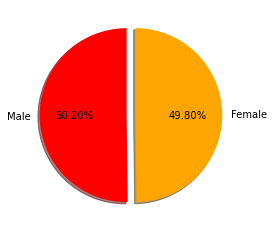

In [75]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
explode = (0.1, 0)
colors = ["red", "orange"]
plt.pie(counts, explode=explode, labels=["Male", "Female"], colors=colors,
        autopct="%1.2f%%", shadow=True, startangle=90)

## Quartiles, Outliers and Boxplots

In [76]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_df = data_df.groupby("Mouse ID").max("Timepoint")

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_tumor_df = pd.merge(data_df, max_timepoint_df["Timepoint"], on=["Mouse ID", "Timepoint"])

final_tumor_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28,5,45.934712,0
245,z435,Propriva,Female,12,26,10,48.710661,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


In [81]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
treatments = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
# Locate the rows which contain mice on each drug and get the tumor volumes
treatment_data = = final_tumor_df.loc[final_tumor_df["Drug Regimen"]==treatment]

tumor_vol_data = final_tumor_df.append(treatment_data["Tumor Volume (mm3)"])

 

iqr = []
lower_bounds = []
upper_bounds = []
for i in range(len(treatments)):
    quartiles = tumor_vol_data[i].quantile([0.25,0.5,0.75])
    quartiles.append(quartiles)
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr.append(upperq - lowerq)
    lower_bounds.append(lowerq - (1.5*iqr[i]))
    upper_bounds.append(upperq + (1.5*iqr[i]))
    
    # Determine outliers using upper and lower bounds
    print(f"Tumor volumes below {round(lower_bounds[i],2)} mm3 and above {round(upper_bounds[i],2)} mm3 could be outliers for {treatments[i]}.")
c326 = final_tumor_df.loc[final_tumor_df["Mouse ID"] == "c326"]
c326   

IndentationError: expected an indented block (<ipython-input-81-40c6e97ae290>, line 11)

In [34]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
flierprops = dict(marker='o', markerfacecolor='b', markersize=6, markeredgecolor='black')
plt.boxplot(tumor_vol_data, flierprops = flierprops)
plt.title("Final Volume ")
plt.ylabel("Tumor Volume (mm3)")
plt.xticks([1, 2, 3, 4],["Capomulin", "Ramicane", "Ibunifol", "Ceftamin"])
plt.show()


NameError: name 'tumor_vol_data' is not defined

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

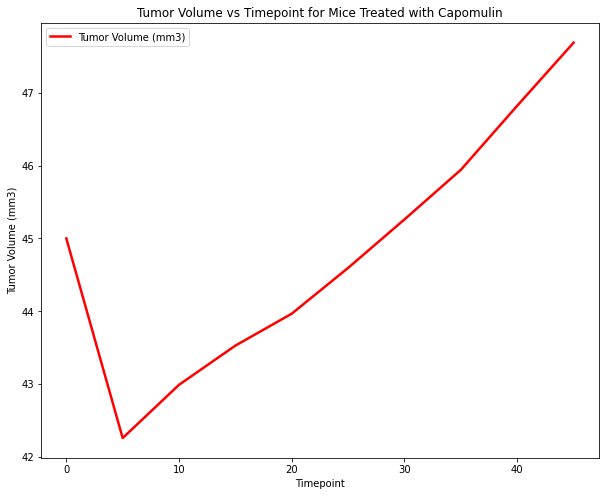

In [35]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
 
capomulin_df = data_df.loc[data_df["Drug Regimen"] == "Capomulin"]
capomulin_mouse = capomulin_df.loc[capomulin_df["Mouse ID"] == "i557"]
capomulin_mouse = capomulin_mouse.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
capomulin_mouse.set_index("Timepoint").plot(figsize=(10,8), linewidth=2.5, color="red")
plt.title("Tumor Volume vs Timepoint for Mice Treated with Capomulin")
plt.ylabel("Tumor Volume (mm3)")

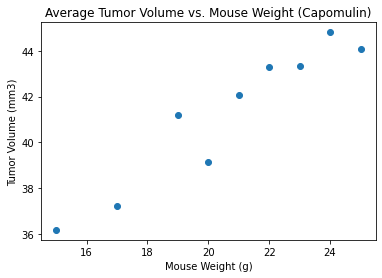

In [36]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin = data_df.loc[data_df["Drug Regimen"] == "Capomulin"]
weight_group = Capomulin.groupby("Weight (g)").mean()

plt.scatter(weight_group.index, weight_group["Tumor Volume (mm3)"])
plt.title("Average Tumor Volume vs. Mouse Weight (Capomulin)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume for Capomulin: 0.65


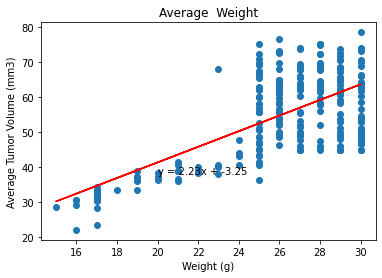

In [38]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


mouse_weight =final_tumor_df.loc[:, "Weight (g)"]
avg_vol = final_tumor_df.loc[:, "Tumor Volume (mm3)"]
corrcoef = st.pearsonr(mouse_weight, avg_vol)
print(f"The correlation coefficient between mouse weight and average tumor volume for Capomulin: {round(corrcoef[0], 2)}")


x_axis = final_tumor_df["Weight (g)"]
y_axis = final_tumor_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_equation,(20,38),fontsize=10,color="black")
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.title("Average  Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()